In [3]:
import numpy as np 
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Реализация поиска равновесия Нэша и рисовки графиков

In [4]:
def nash_equilibrium(A): #поиск равновесия Нэша
     p1 = [ ] ##первый игрок
     p2 = [ ] ##второй игрок
     count = 0 
     ##коэффициенты для задачи линейного програмиирования
     line1 = [ ]
     line2 = [ ]
     koef1 = [ ]
     koef2 = [ ]
     m = A.shape[0] ##столбцы матрицы
     n = A.shape[1] ##cтроки матрицы

     mmin = np.amin(A)
     if (mmin <= 0):
          A = A + abs(mmin) + 1 
     else:
          count = count + mmin - 1 
     
     Atr = -A.transpose() ##транспонированная матрица
     line1 = -np.ones(n)
     koef1 = np.ones(m)
     line2 = np.ones(m)
     koef2 = -np.ones(n)
     
     matrix = linprog(line1, A_ub = A, b_ub = koef1)
     p2 = matrix.get("x")
     matrix = linprog(line2, A_ub = Atr, b_ub = koef2)
     p1 = matrix.get("x")
     count = 1 / np.sum(p1)
     p1 = p1 * count
     p2 = p2 * count
     
     print ("стратегия первого игрока: ", p1)
     print ("стратегия второго игрока: ", p2)
     print ("Игровая сумма: ", count)
     return p1, p2, count

def art(p,q): #рисовка гистограммы 
     f1 = [ ]
     for i in range (len(p)):
          f1.append(i)
     st = plt.figure()
     plt.bar(f1, p)
     plt.title("стратегия 1 игрока: ")
     plt.xlabel('Стратегия')
     plt.ylabel('Вероятность')
     plt.xlim(0,len(p))
     plt.ylim(0, np.max(p)+1)
     
     f2 = [ ]
     for i in range (len(q)):
          f2.append(i)
     st = plt.figure()
     plt.bar(f2, p)
     plt.title("стратегия 2 игрока: ")
     plt.xlabel('Стратегия')
     plt.ylabel('Вероятность')
     plt.xlim(0,len(q))
     plt.ylim(0, np.max(q)+1)
     plt.show()

# Задача из примера

стратегия первого игрока:  [ 0.          0.12903226  0.09677419  0.43548387  0.33870968  0.        ]
стратегия второго игрока:  [ 0.          0.          0.69086022  0.14516129  0.14784946  0.01612903]
Игровая сумма:  5.87096774194


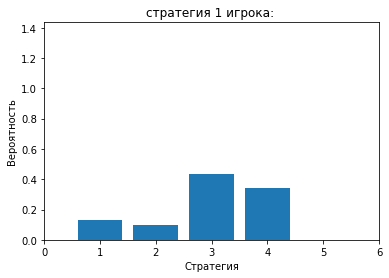

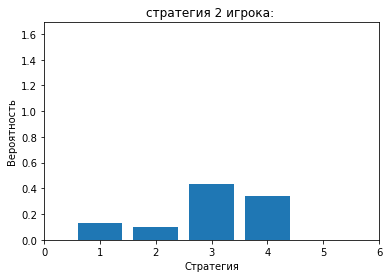

In [5]:
a = np.array([[4, 0, 6, 2, 2, 1], 
              [3, 8, 4, 10, 4, 4], 
              [1, 2, 6, 5, 0, 0], 
              [6, 6, 4, 4, 10, 3],
              [10, 4, 6, 4, 0, 9],
              [10, 7, 0, 7, 9, 8]])
p,q,count = nash_equilibrium(a)
art(p, q)

# Пример равновесного спектра стратегий

стратегия первого игрока:  [ 0.  1.  0.  0.  0.]
стратегия второго игрока:  [ 0.  0.  1.  0.  0.]
Игровая сумма:  5.0


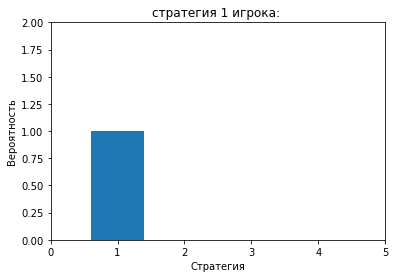

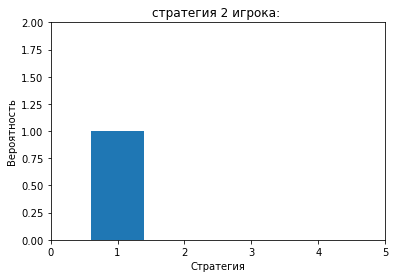

In [6]:
a = np.array([[3, 9, 2, 1, 1], 
              [7, 8, 5, 6, 8], 
              [4, 7, 3, 5, 7], 
              [5, 6, 1, 7, 7],
              [6, 7, 1, 4, 5]])
p,q,count = nash_equilibrium(a)
art(p, q)

# Пример неполного спектра стратегий

стратегия первого игрока:  [ 0.          0.12903226  0.09677419  0.43548387  0.33870968  0.        ]
стратегия второго игрока:  [ 0.          0.          0.69086022  0.14516129  0.14784946  0.01612903]
Игровая сумма:  5.87096774194


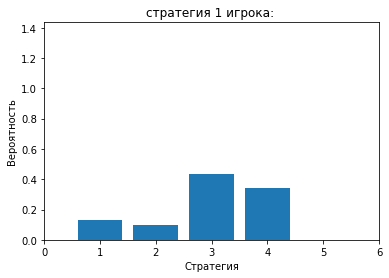

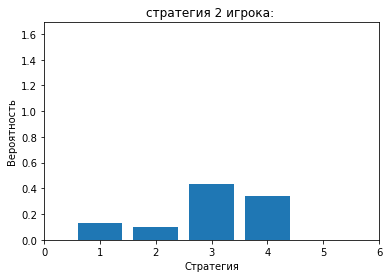

In [7]:
a = np.array([[4,0,6,2,2,1],
              [3,8,4,10,4,4],
              [1,2,6,5,0,0],
              [6,6,4,4,10,3],
              [10,4,6,4,0,9],
              [10,7,0,7,9,8]])
p,q,count =nash_equilibrium(a)
art(p, q)

# Пример полного спектра стратегий

стратегия первого игрока:  [ 0.25  0.25  0.25  0.25]
стратегия второго игрока:  [ 0.25  0.25  0.25  0.25]
Игровая сумма:  2.5


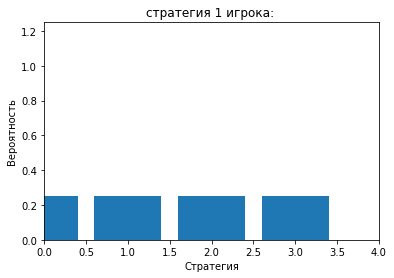

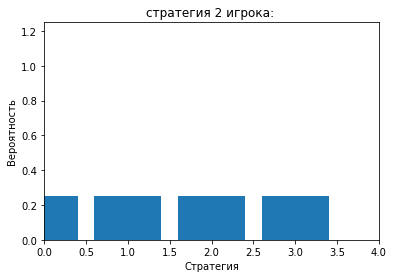

In [14]:
a = np.array([[1, 2, 3, 4], 
              [2, 3, 4, 1],
              [3, 4, 1, 2], 
              [4, 1, 2, 3]])
p,q,count =nash_equilibrium(a)
art(p, q)